In [1]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import pandas
import csv
import math 
from sklearn.preprocessing import OneHotEncoder

In [2]:
with open('data/netflix_titles.csv',encoding = "utf-8") as f:
    reader = csv.reader(f)
    data=next(reader)[1:-1]
    del data[1]
    del data[2]
    del data[3]
    data=[data]
    for row in reader:
        if "Season" in row[-3]:
            continue
        r=row[1:-1]
        del r[1]
        del r[2]
        del r[3]
        r[-2]=int(r[-2].replace('min',''))
        data.append(r)
    #print(data)

In [3]:
with open('netflix.csv', 'w', encoding="utf-8") as f:
    writer = csv.writer(f)
    for row in data:
        writer.writerow(row)

In [4]:
netflix = pandas.read_csv('netflix.csv')
netflix.head(10)

,type,director,country,release_year,rating,duration,listed_in
0,Movie,"Richard Finn, Tim Maltby","United States, India, South Korea, China",2019,TV-PG,90,"Children & Family Movies, Comedies"
1,Movie,NaN,United Kingdom,2016,TV-MA,94,Stand-Up Comedy
2,Movie,Fernando Lebrija,United States,2017,TV-14,99,Comedies
3,Movie,Gabe Ibáñez,"Bulgaria, United States, Spain, Canada",2014,R,110,"International Movies, Sci-Fi & Fantasy, Thrillers"
4,Movie,"Rodrigo Toro, Francisco Schultz",Chile,2017,TV-MA,60,Stand-Up Comedy
5,Movie,Henrik Ruben Genz,"United States, United Kingdom, Denmark, Sweden",2014,R,90,"Action & Adventure, Thrillers"
6,Movie,José Miguel Contreras,NaN,2017,TV-MA,78,Stand-Up Comedy
7,Movie,Daniel Alfredson,"Netherlands, Belgium, United Kingdom, United S...",2015,R,95,"Action & Adventure, Dramas, International Movies"
8,Movie,NaN,NaN,2009,TV-Y7,58,Children & Family Movies
9,Movie,"Munjal Shroff, Tilak Shetty",NaN,2013,TV-Y7,62,Children & Family Movies


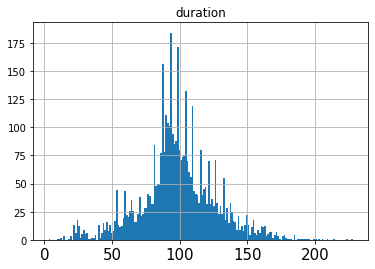

In [5]:
length = len(netflix["duration"].unique())
netflix.hist(column="duration",bins=length, xlabelsize=15)
plt.show()

In [6]:
netflix = netflix[netflix["duration"] < 250]

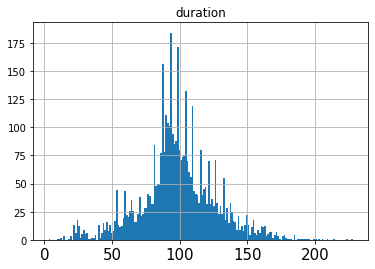

In [7]:
length = len(netflix["duration"].unique())
netflix.hist(column="duration",bins=length, xlabelsize=15)
plt.show()

In [8]:
#encode and bind
def eab(original_dataframe, feature_to_encode):
    dummies = pandas.get_dummies(original_dataframe[[feature_to_encode]])
    res = pandas.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res)

In [9]:
features_to_encode = ['type','rating']
for feature in features_to_encode:
    netflix=eab(netflix, feature)

In [10]:
def feature_collect(netflix,column):
    y=netflix[column].str.split(",")
    feat=set()
    for x in y.values:
        if not isinstance(x,list):
            feat.add(x)
            continue
        for val in x:
            feat.add(val)
    return feat

In [11]:
def feat_encode(df,column):
    features=feature_collect(df,column)
    feat={}
    for i,f in enumerate(features):
        feat[f]=i
    one_hot=[]
    for names in df[column]:
        if isinstance(names,float):
            one_hot.append([feat[names]])
            continue
        temp=[]
        for n in names.split(','):
            temp.append(feat[n])
        temp.sort()
        one_hot.append(temp)
    
    return one_hot

In [12]:
def encodeCol(df,column):
    one_hot=feat_encode(df,column)
    new_col={column+'_en':one_hot}
    df2 = pandas.DataFrame(data=new_col)
    df=df.drop(column,axis=1)
    return pandas.concat([df, df2], axis=1)

In [13]:
mlb_list=['director','country','listed_in']
df=netflix.copy()
for col in mlb_list:
    df = encodeCol(df,col)
df.head()

,release_year,duration,type_Movie,rating_G,rating_NC-17,rating_NR,rating_PG,rating_PG-13,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_TV-Y7,rating_TV-Y7-FV,rating_UR,director_en,country_en,listed_in_en
0,2019,90,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,"[1939, 2412]","[8, 57, 133, 143]","[17, 25]"
1,2016,94,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,[0],[19],[22]
2,2017,99,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,[282],[57],[24]
3,2014,110,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,[1913],"[30, 35, 60, 115]","[26, 28, 30]"
4,2017,60,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,"[2474, 2790]",[75],[22]


In [14]:
netflix.head()

,director,country,release_year,duration,listed_in,type_Movie,rating_G,rating_NC-17,rating_NR,rating_PG,rating_PG-13,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_TV-Y7,rating_TV-Y7-FV,rating_UR
0,"Richard Finn, Tim Maltby","United States, India, South Korea, China",2019,90,"Children & Family Movies, Comedies",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,NaN,United Kingdom,2016,94,Stand-Up Comedy,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Fernando Lebrija,United States,2017,99,Comedies,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,Gabe Ibáñez,"Bulgaria, United States, Spain, Canada",2014,110,"International Movies, Sci-Fi & Fantasy, Thrillers",1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,"Rodrigo Toro, Francisco Schultz",Chile,2017,60,Stand-Up Comedy,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [15]:
df.to_csv('netflix.csv', encoding='utf-8', index=False)